In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

In [2]:
labels = pd.read_csv("ceph_hgdp_minor_code_XNA.sampleInformation.csv")
regions = labels['region'].unique()
groupid = []
for region in regions:
    ids = labels[labels['region'] == region].index
    groupid.append(ids)

data = pd.read_csv('ceph_hgdp_minor_code_XNA.betterAnnotated.csv')
X = data.drop(columns=['snp', 'chr', 'pos']).to_numpy()
projector = GaussianRandomProjection(n_components=5000, eps=0.05)
X_red = projector.fit_transform(X.T)

Text(0.5, 0, 'Third PCA Axis')

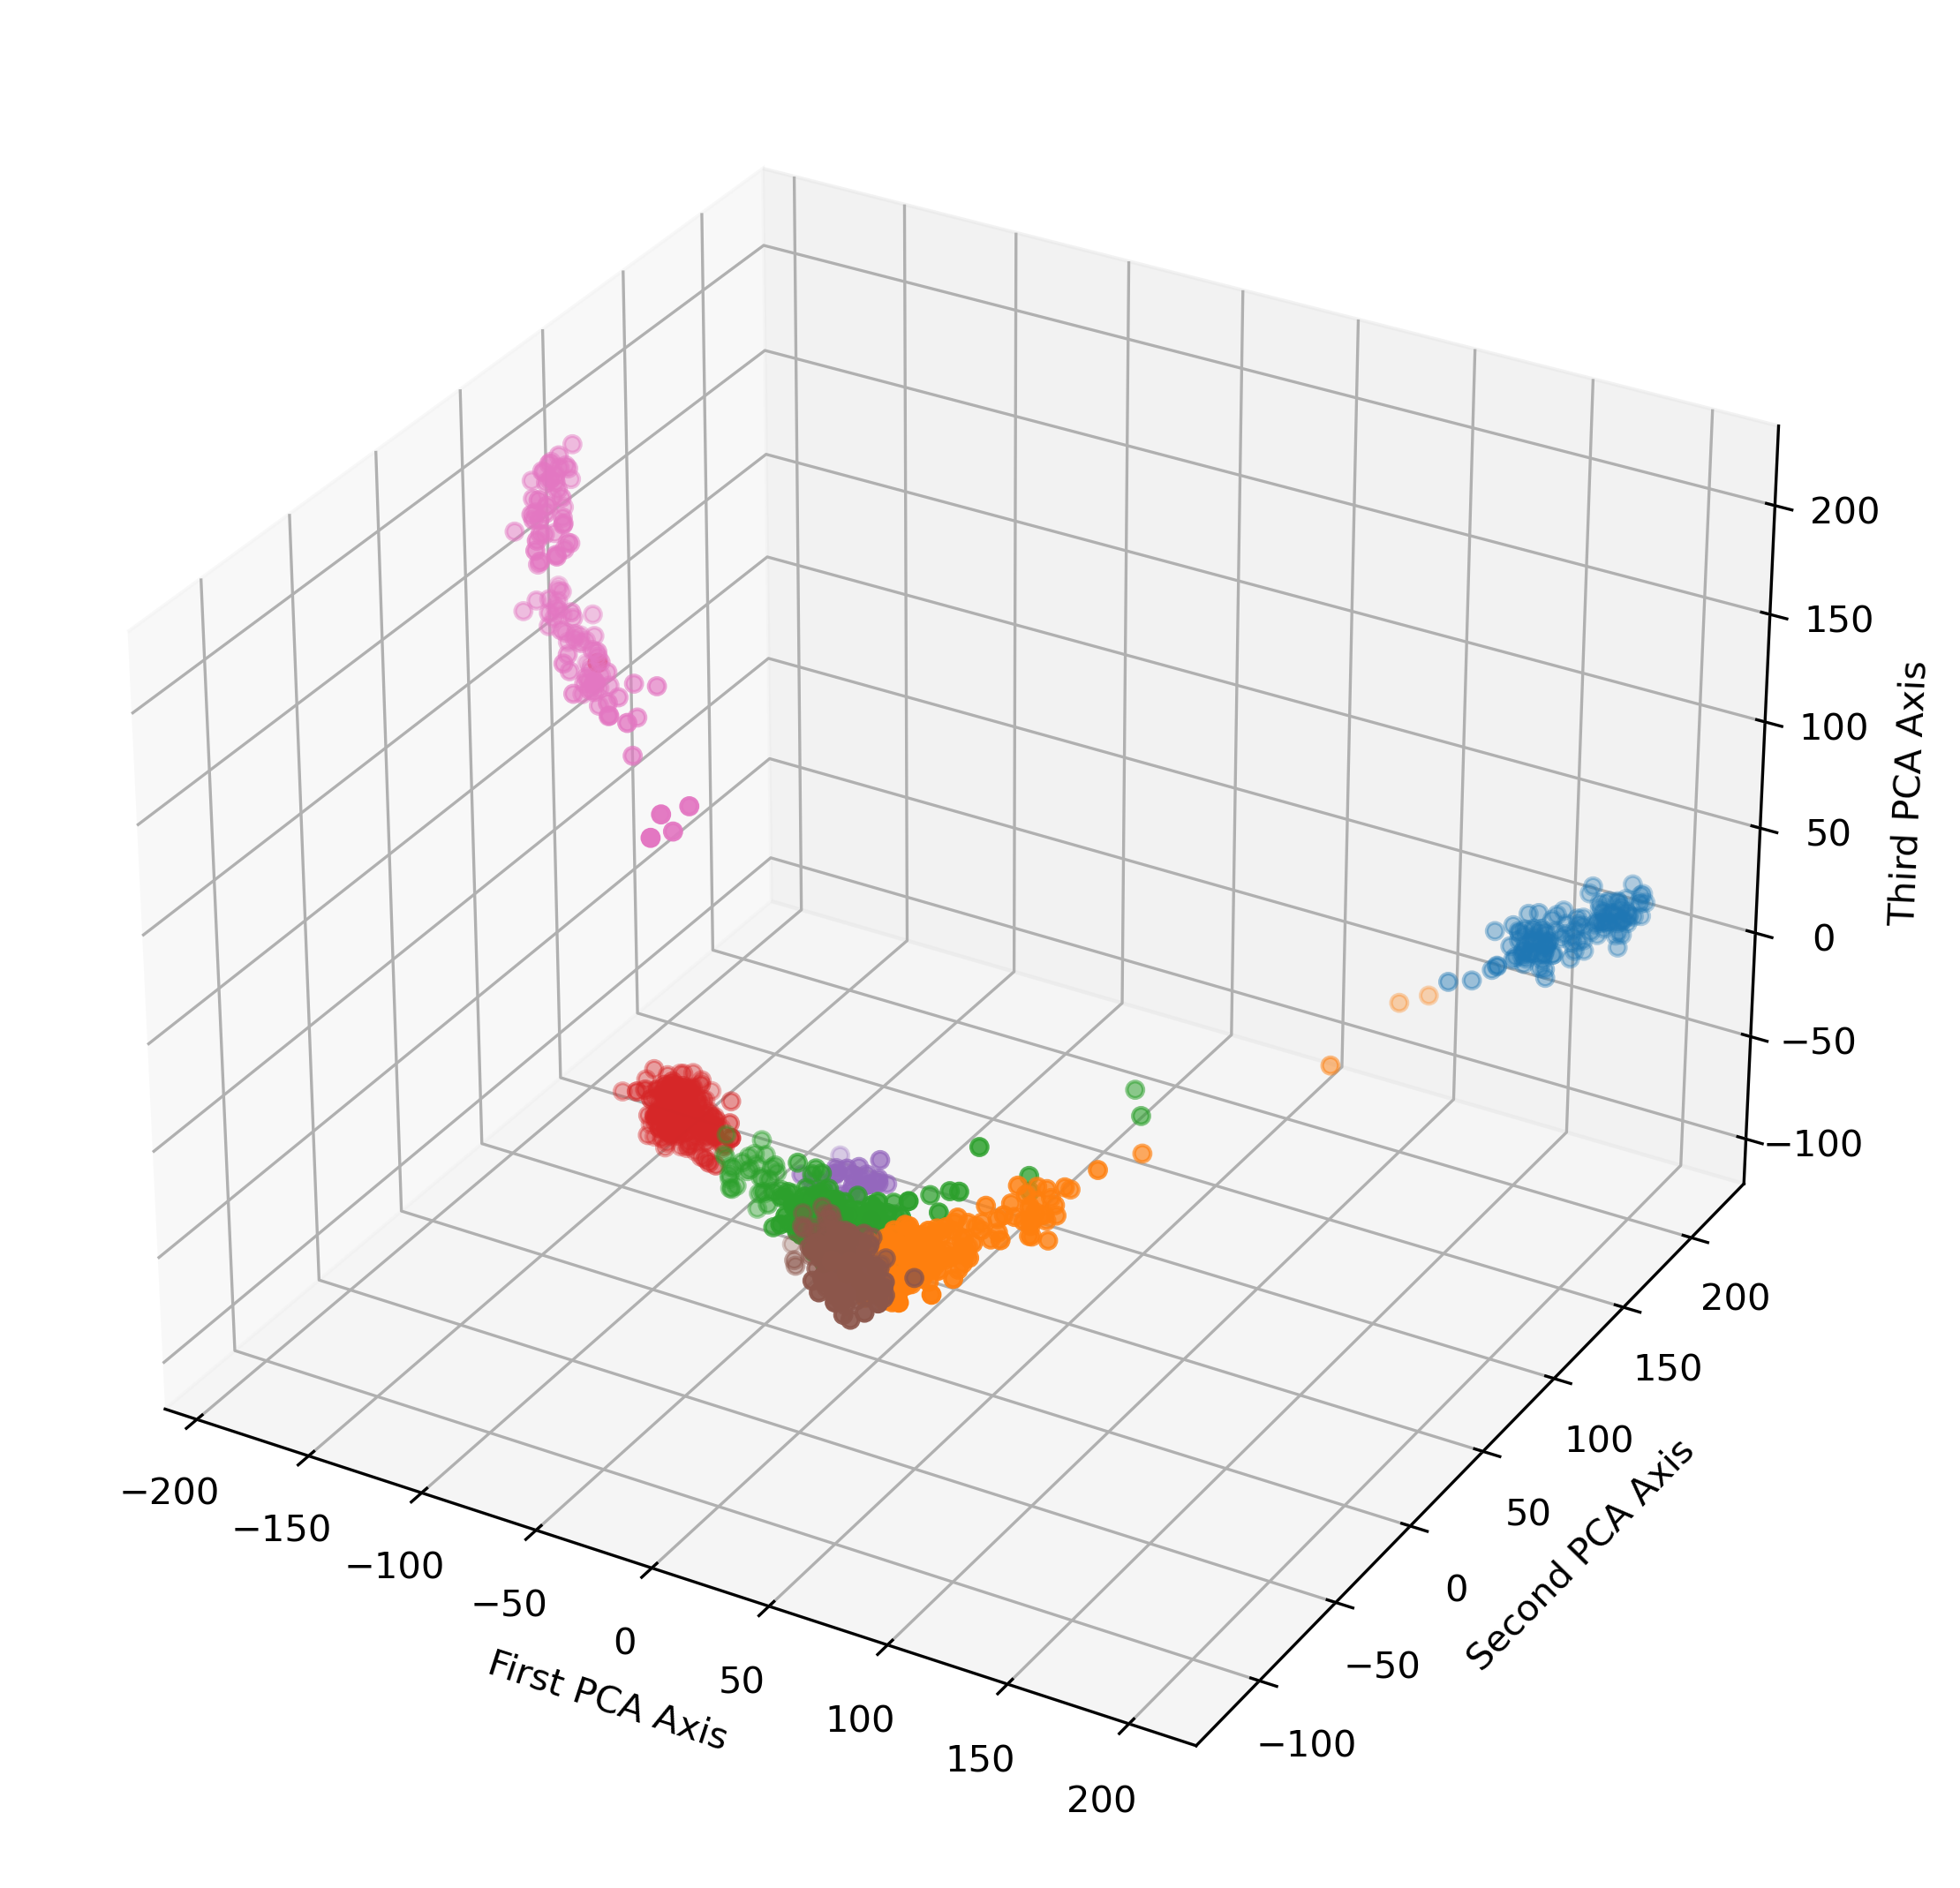

In [14]:
pca = PCA(n_components=3)
X_pca3 = pca.fit_transform(X_red)

fig = plt.figure(figsize=(9, 9), dpi=300)
ax = fig.add_subplot(projection='3d')
for i, region in enumerate(regions):
    ax.scatter(X_pca3[groupid[i], 0], X_pca3[groupid[i], 1], X_pca3[groupid[i], 2])

ax.set_xlabel("First PCA Axis")
ax.set_ylabel("Second PCA Axis")
ax.set_zlabel("Third PCA Axis")

Text(0, 0.5, 'Second PCA Axis')

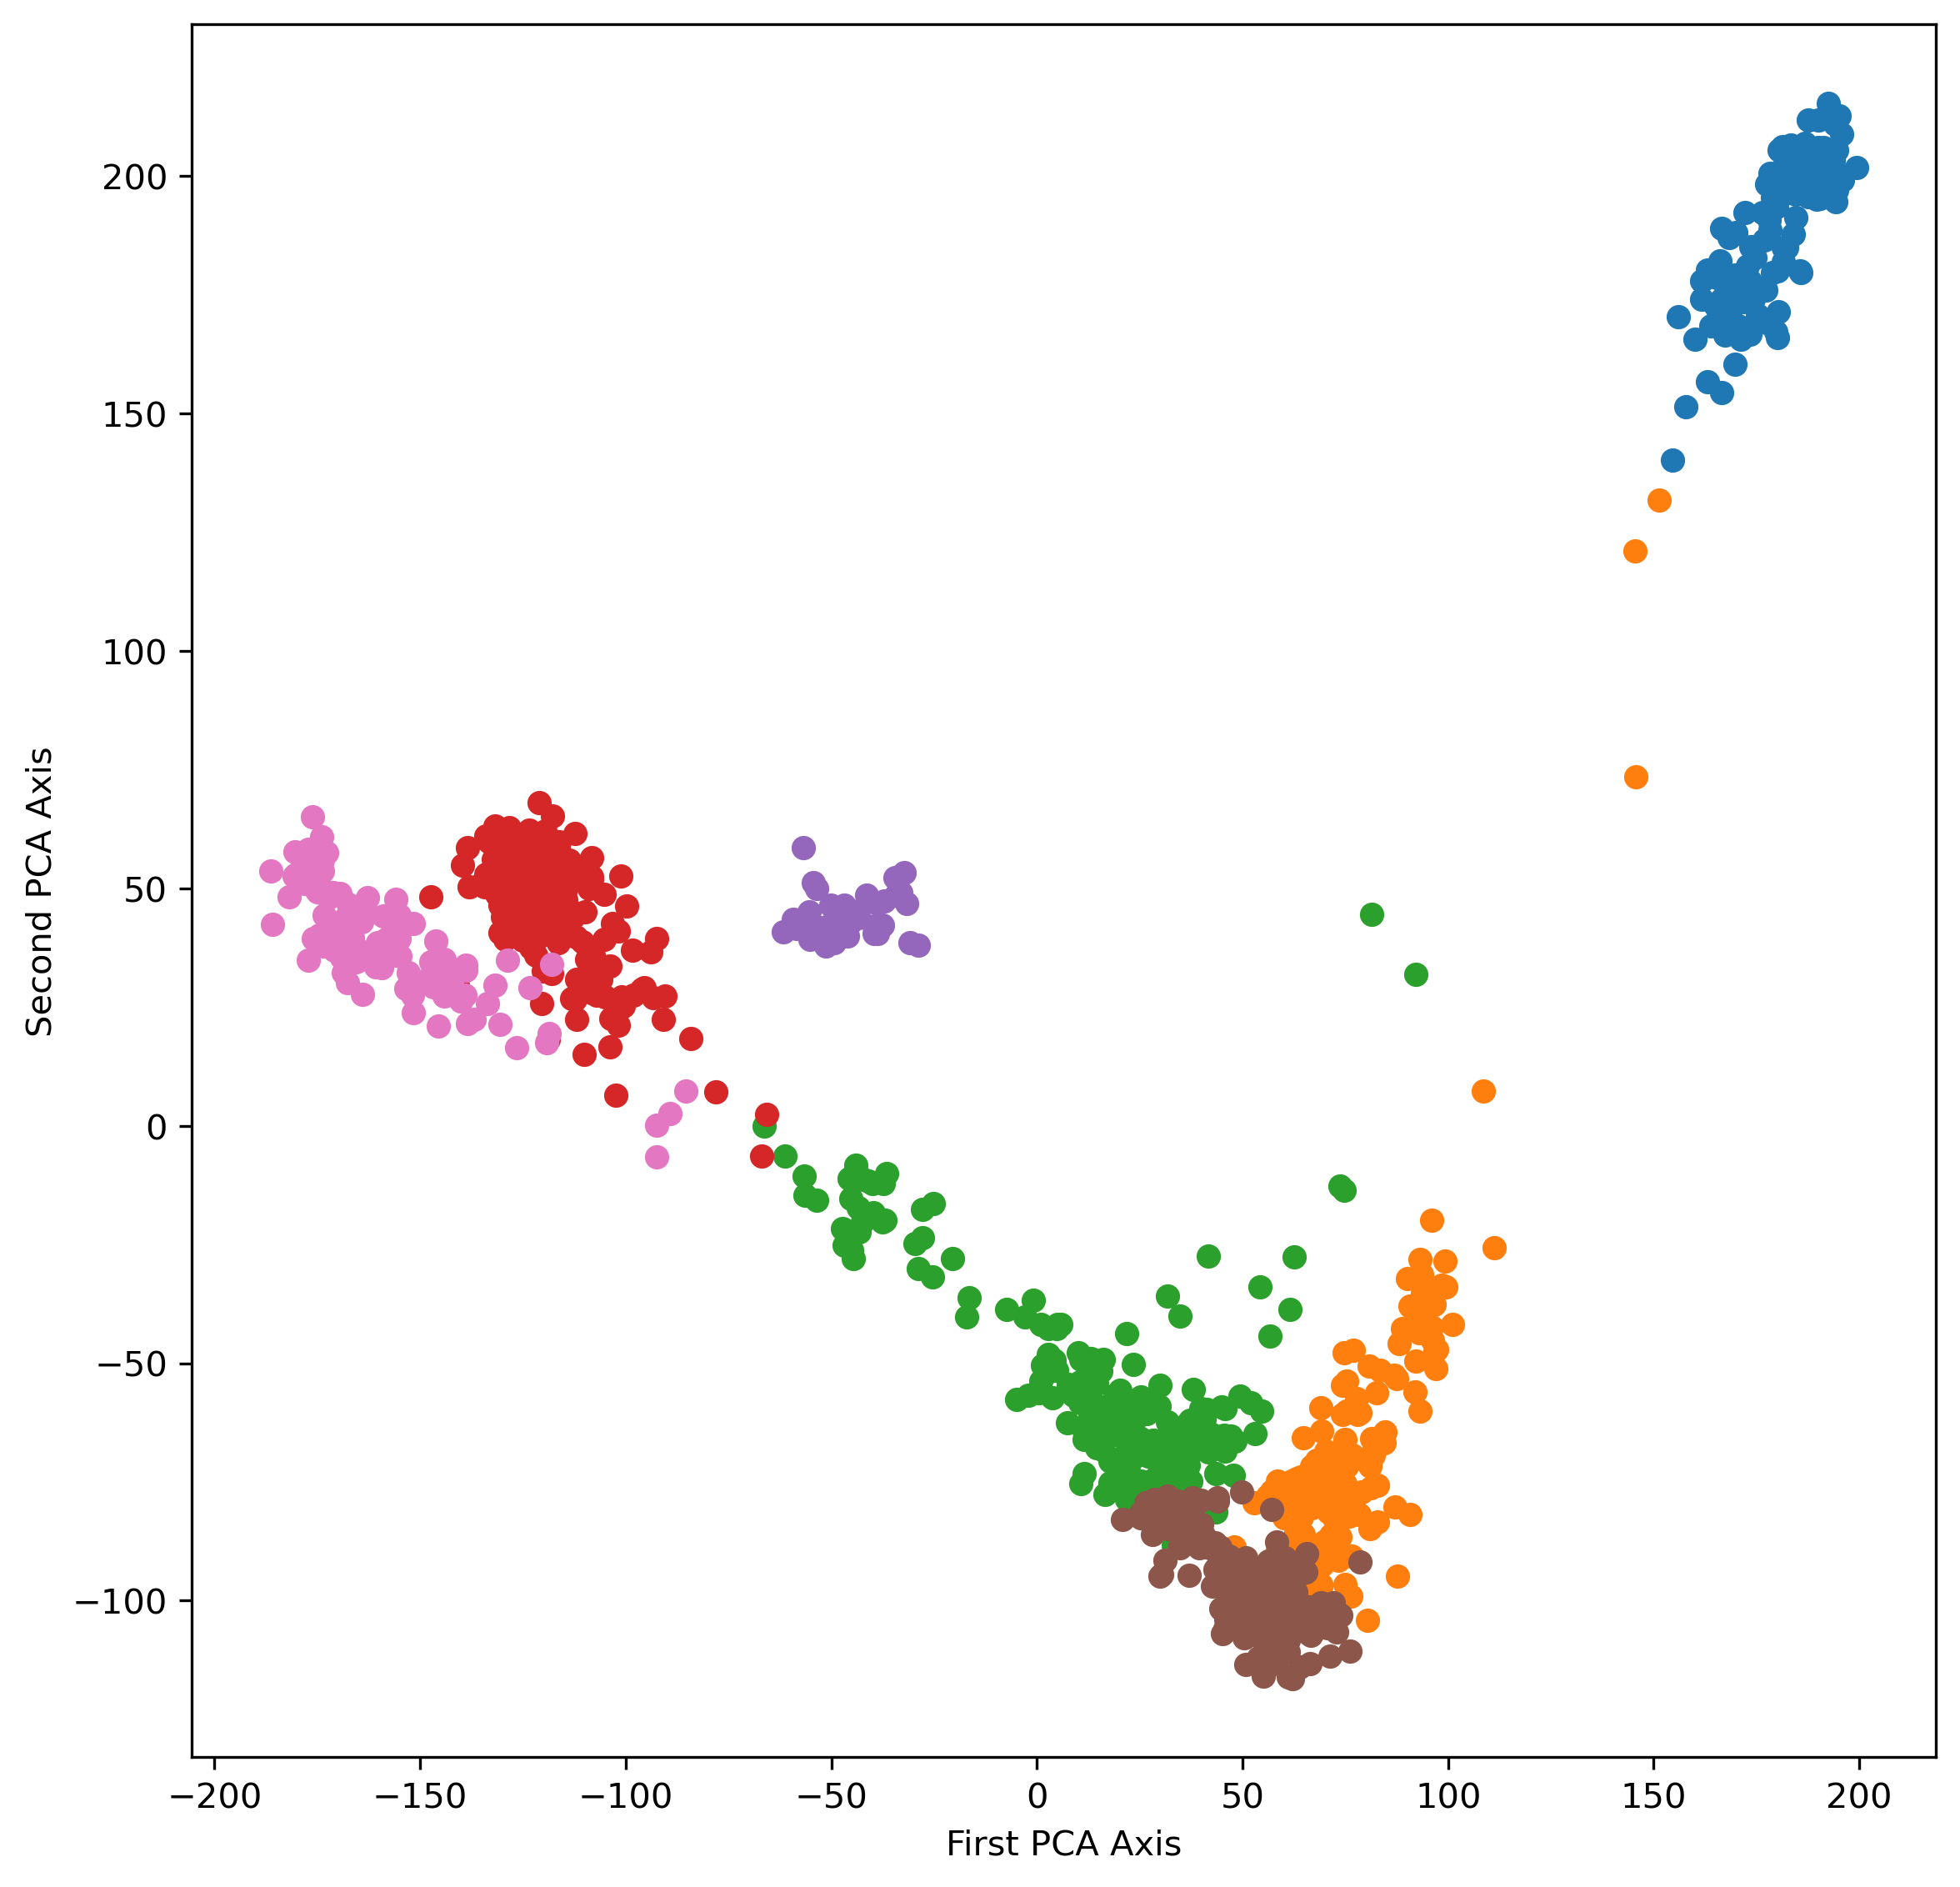

In [12]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_red)

fig = plt.figure(figsize=(9, 9), dpi=300)
for i, region in enumerate(regions):
    plt.scatter(X_pca2[groupid[i], 0], X_pca2[groupid[i], 1])

plt.xlabel("First PCA Axis")
plt.ylabel("Second PCA Axis")